In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [ ]:
path = r'D:\Lab Data\lorentz_force\sphere20250507\20250513\2.5 V\Background\\tt'
files = np.linspace(0, 9, 10, dtype=int)
end = '.hdf5'
PSDs = np.zeros((len(files), 50001))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    fs = round(1/attrs['delta_t'])
    PSD = scisig.welch(data['channel_d'], fs=fs, nperseg=int(0.1*fs))
    PSDs[n] = PSD[1]
frequency = PSD[0]

PSD_avr_bg = sum(PSDs)/len(PSDs)

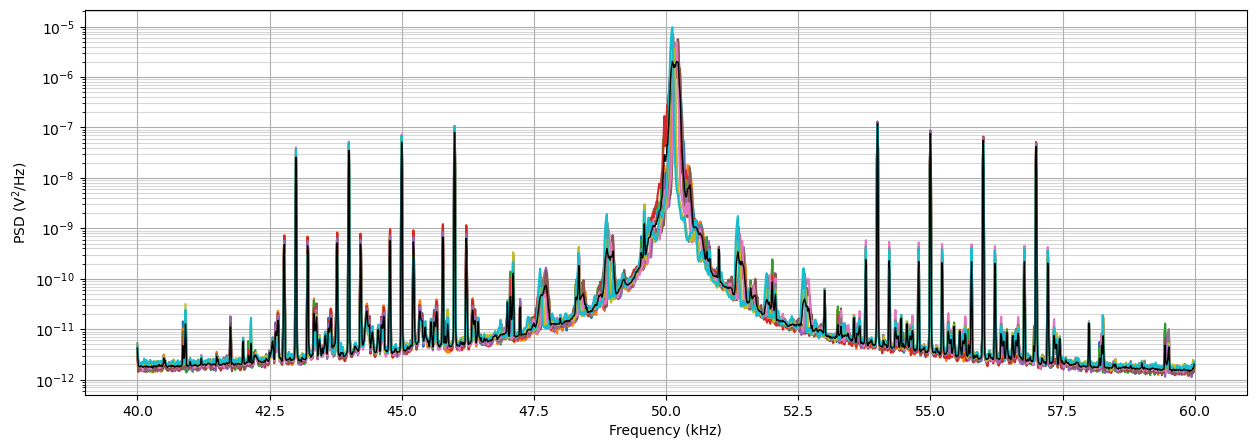

In [4]:
lb = 4000
ub = 6000
plt.figure(figsize = (15, 5))
for PSD in PSDs:
    plt.plot(frequency[lb:ub]/1000, PSD[lb:ub])
plt.plot(frequency[lb:ub]/1000, PSD_avr_bg[lb:ub], 'k', linewidth = 1)
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.grid()
plt.grid(which = 'minor', alpha = 0.5)

In [30]:
freqs = [43000, 44000, 45000, 46000, 54000, 55000, 56000, 57000]

path = r'D:\Lab Data\lorentz_force\sphere20250507\20250513\2.5 V\Background\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases = np.zeros((8, len(files)*10))
amps = np.zeros((8, len(files)*10))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for m, freq in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
            amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
            amps[m, 10*n+i] = amp
            phases[m, 10*n+i] = phase[1]

files = np.linspace(0, 49, 50, dtype=int)
positions = np.linspace(0, 15, 16, dtype=int)
phases_pos = np.zeros((len(positions), 8, len(files)*10))
amps_pos = np.zeros((len(positions), 8, len(files)*10))

for posind, position in enumerate(positions):
    path = r'D:\Lab Data\lorentz_force\sphere20250507\20250513\2.5 V\pos'+str(position)+r'\tt'
    end = '.hdf5'
    phases2 = np.zeros((8, len(files)*10))
    amps2 = np.zeros((8, len(files)*10))
    for n, file in enumerate(files):
        filename = path + str(file) + end
        data, attrs = au.load_data_lf(filename)
        for i in range(10):
            drive = data['channel_f'][i*10**6:(i+1)*10**6]
            drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
            fft_drive = np.fft.rfft(drive)
            fft_drive2 = np.fft.rfft(drive2)
            for m, freq in enumerate(freqs):
                phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                amps2[m, 10*n+i] = amp
                phases2[m, 10*n+i] = phase[1]
    phases_pos[posind] = phases2
    amps_pos[posind] = amps2

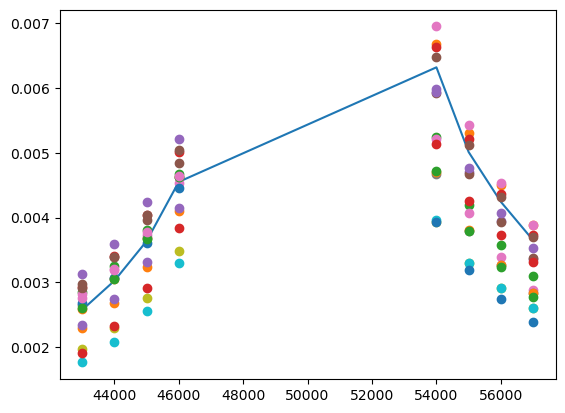

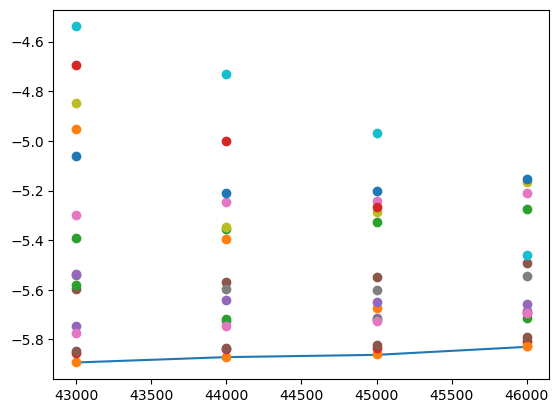

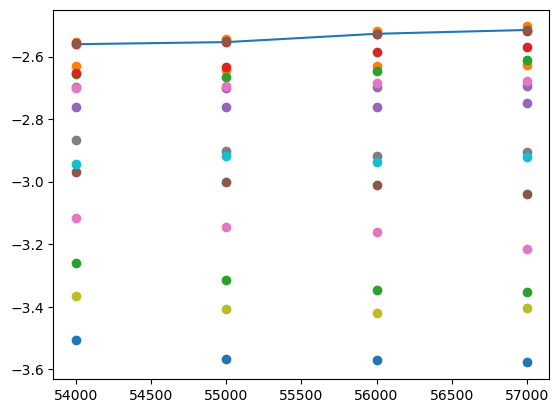

In [31]:
plt.plot(freqs, np.mean(amps, axis = 1))
for amp_pos in np.mean(amps_pos, axis = 2):
    plt.plot(freqs, amp_pos, 'o')

plt.figure()
plt.plot(freqs[:4], np.mean(phases, axis = 1)[:4])
for phase_pos in np.mean(phases_pos, axis = 2):
    plt.plot(freqs[:4], phase_pos[:4], 'o')

plt.figure()
plt.plot(freqs[4:], np.mean(phases, axis = 1)[4:])
for phase_pos in np.mean(phases_pos, axis = 2):
    plt.plot(freqs[4:], phase_pos[4:], 'o')

In [89]:
amp_err = np.zeros((8, 16))
for f in range(8):
    for p in range(16):
        amp_err[f, p] = np.std(amps_pos[p][f])

phase_err = np.zeros((8, 16))
for f in range(8):
    for p in range(16):
        phase_err[f, p] = np.std(phases_pos[p][f])

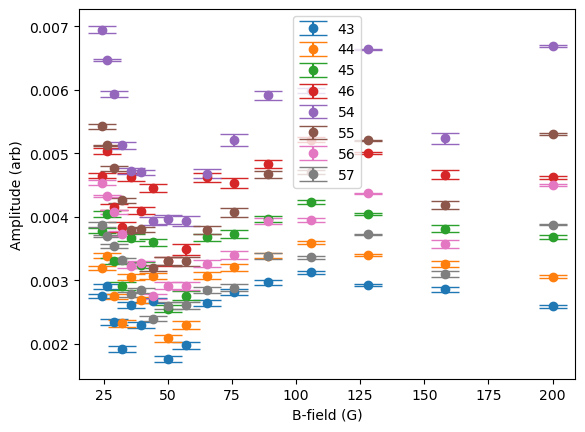

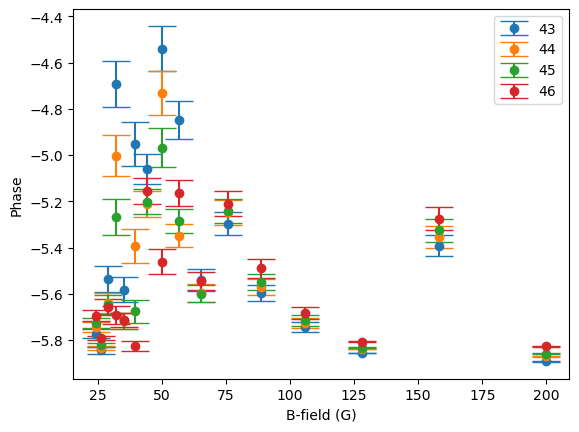

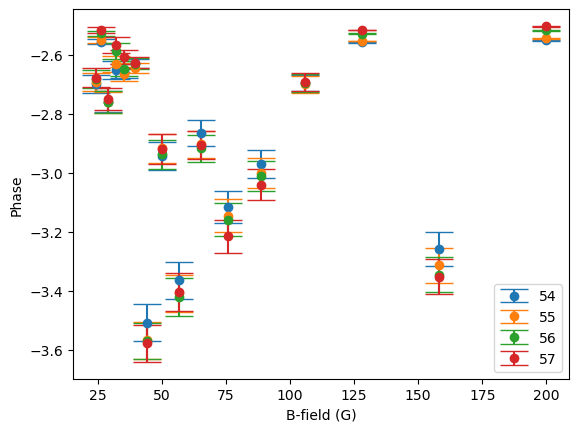

In [93]:
freqlab = [43, 44, 45, 46, 54, 55, 56, 57]

plt.figure()
for n, i in enumerate(np.transpose(np.mean(amps_pos, axis = 2))):
    plt.errorbar(1.28/((positions+8)*10**(-2))**2, i, yerr = amp_err[n]/np.sqrt(500), linestyle = 'None', marker = 'o', capsize = 10, label = str(freqlab[n]))
plt.ylabel('Amplitude (arb)')
plt.xlabel('B-field (G)')
plt.legend()

plt.figure()
for n, i in enumerate(np.transpose(np.mean(phases_pos, axis = 2))[:4]):
    plt.errorbar(1.28/((positions+8)*10**(-2))**2, i, yerr = phase_err[n]/np.sqrt(500), linestyle = 'None', marker = 'o', capsize = 10, label = str(freqlab[n]))
plt.ylabel('Phase')
plt.xlabel('B-field (G)')
plt.legend()

plt.figure()
for n, i in enumerate(np.transpose(np.mean(phases_pos, axis = 2))[4:]):
    plt.errorbar(1.28/((positions+8)*10**(-2))**2, i, yerr = phase_err[n+4]/np.sqrt(500), linestyle = 'None', marker = 'o', capsize = 10, label = str(freqlab[n+4]))
plt.ylabel('Phase')
plt.xlabel('B-field (G)')
plt.legend()

In [35]:
# Charge
import scipy.signal as scisig

In [37]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250513\Charge\50mV87kHznoamp3.2e-8mbar.mat'
data = sio.loadmat(filename)
D = np.transpose(data['D'])[0]
dt = data['Tinterval'][0][0]
PSDD = scisig.welch(D, fs = 1/dt, nperseg = int(0.1/dt))

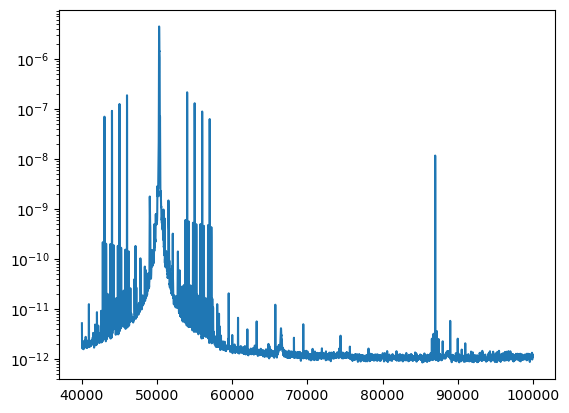

In [39]:
plt.plot(PSDD[0][4000:10000], PSDD[1][4000:10000])
plt.yscale('log')

In [42]:
np.sqrt(PSDD[1][8700])/5

2.156204282073304e-05

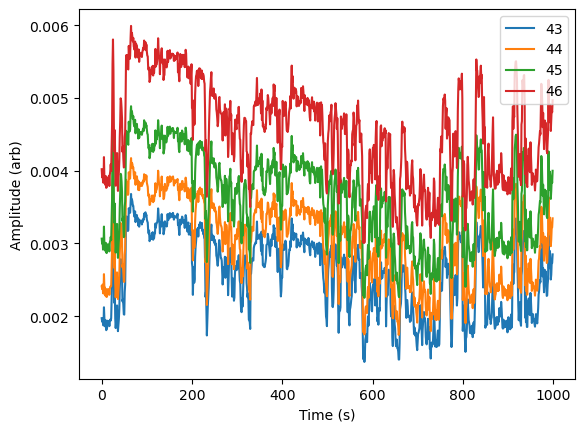

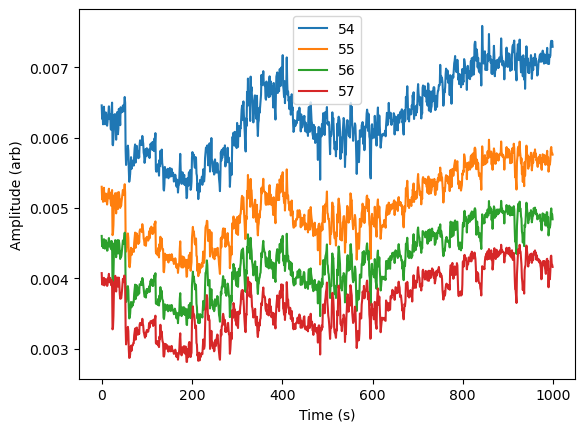

In [52]:
freqlab = [43, 44, 45, 46, 54, 55, 56, 57]
for n, amp in enumerate(amps[:4]):
    plt.plot(amp, label = str(freqlab[n]))
plt.ylabel('Amplitude (arb)')
plt.xlabel('Time (s)')
plt.legend()
plt.figure()
for n, amp in enumerate(amps[4:]):
    plt.plot(amp, label = str(freqlab[n+4]))
plt.ylabel('Amplitude (arb)')
plt.xlabel('Time (s)')
plt.legend()

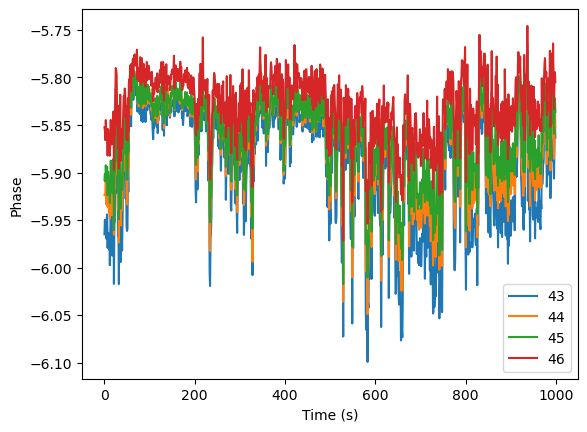

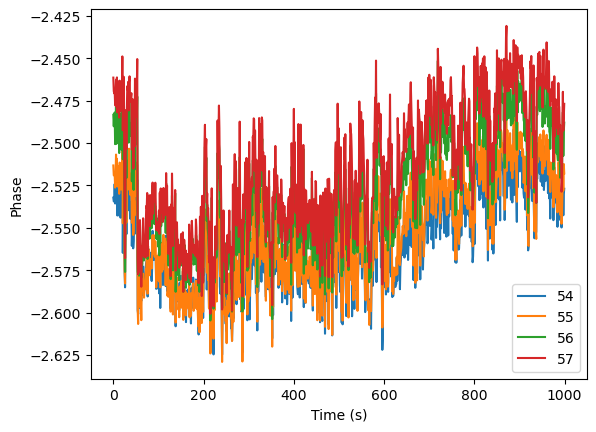

In [70]:
for n, phase in enumerate(phases[:4]):
    plt.plot(phase, label = str(freqlab[n]))

plt.ylabel('Phase')
plt.xlabel('Time (s)')
plt.legend()
plt.figure()
for n, phase in enumerate(phases[4:]):
    plt.plot(phase, label = str(freqlab[n+4]))
    
plt.ylabel('Phase')
plt.xlabel('Time (s)')
plt.legend()

In [54]:
path = r'D:\Lab Data\lorentz_force\sphere20250507\20250513\2.5 V\Background\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
cf = np.zeros(len(files)*10)
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        PSD = scisig.welch(drive2, fs = 10**6, nperseg = 10**6)
        cf[i+10*n] = np.argmax(PSD[1][40000:60000])+40000

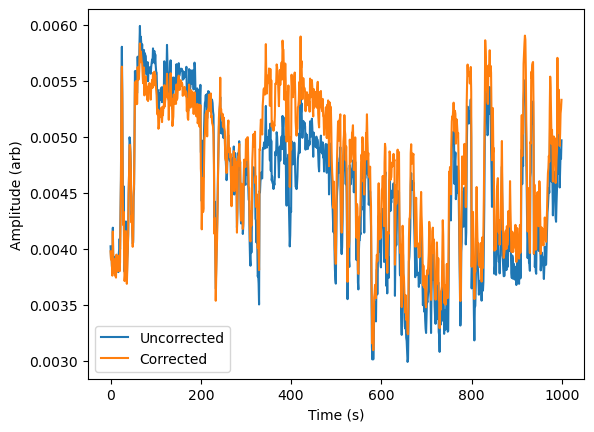

In [71]:
plt.plot(amps[3], label = 'Uncorrected')
plt.plot(amps[3]*(cf**2-43000**2)**2/10**18*2.2, label = 'Corrected')
plt.ylabel('Amplitude (arb)')
plt.xlabel('Time (s)')
plt.legend()

In [116]:
# Allan deviation of background:

num_avrs = [1, 2, 5, 10, 20, 50, 100]
devs = []
for na in num_avrs:
    samples = np.zeros(int(len(amps[0])/na))
    print(len(samples))
    for m, i in enumerate(range(int(len(amps[0])/na))):
        samples[m] = np.mean(amps[0][i*na:(i+1)*na])
    devs.append(np.sqrt(abs((1/(len(amps[0]/na-1)))*sum(samples[1:]-samples[:-1])/2)))

1000
500
200
100
50
20
10


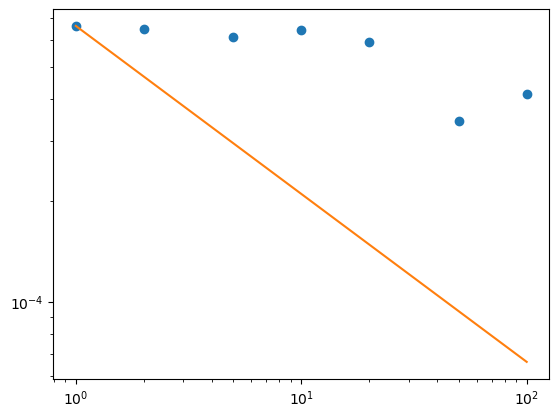

In [119]:
plt.plot(num_avrs, devs, 'o')
plt.plot(num_avrs, devs[0]*1/np.sqrt(num_avrs))
plt.yscale('log')
plt.xscale('log')

In [113]:
devs

[0.0006623066803989524,
 0.0006483778881649899,
 0.0006133175720931333,
 0.0006428542227360493,
 0.0005911365364488775,
 0.0003455885169298821,
 0.00041446252367993177]